In [138]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf


In [139]:
# test = True
test = False

The Brain tumor dataset is taken from `./brain_tumor_dataset/yes` and `brain_tumor_dataset/no` directories.

The dataset is divided into 2 directories: "yes" & "no". There are 253 images (155 images for "yes" and 98 images for "no").

Out of 253 images, 202 images are used for training and 51 images are used for validation.

In [140]:
yes_imgs=os.listdir('./brain_tumor_dataset/yes')
no_imgs=os.listdir('./brain_tumor_dataset/no')

full_dataset=np.concatenate([yes_imgs,no_imgs])

In [141]:
if(test):
  print( full_dataset.size, full_dataset )

The `resized_imgs` list contains the resized images of the `yes_imgs` and `no_imgs` lists.

In [142]:
orig_imgs: list[cv2.Mat] = []
resized_imgs: list[cv2.Mat] = []
for img_file in yes_imgs:
    img = cv2.imread('./brain_tumor_dataset/yes/'+img_file)
    orig_imgs.append(img)
    resized_img = cv2.resize(img, (32, 32))
    resized_imgs.append(resized_img)

for img_file in no_imgs:
    img = cv2.imread('./brain_tumor_dataset/no/'+img_file)
    orig_imgs.append(img)
    resized_img = cv2.resize(img, (32, 32))
    resized_imgs.append(resized_img)


In [143]:
# # Displaying the first image in resized_imgs
if(test):
  cv2.imshow('image0', resized_imgs[0])
  cv2.waitKey(0)
  cv2.destroyAllWindows()

Convert the `resized_imgs` list to a numpy array and save it as `X`.

In [144]:
X = np.squeeze(resized_imgs)

In [145]:
if (test):
  print(type(X))
  print(X.shape)
  print(X)

In [146]:
if (test):
  print(resized_imgs)

Normalize each pixel of the image present in the numpy array `X` and save it as `X`.

In [147]:

# normalize data
X = X.astype('float32')
X /= 255

In [148]:
if(test):
  print(X)

The `img_labels` list stores the labels for each image. The labels are 0 for "no" and 1 for "yes".

In [149]:
labels_yes=np.full(len(yes_imgs),1)
labels_no=np.full(len(no_imgs),0)

img_labels=np.concatenate([labels_yes,labels_no])


In [150]:
if(test):
  print( img_labels.size, img_labels )

In [151]:
# from keras.utils.np_utils import to_categorical
# categorical_labels = to_categorical(img_labels, num_classes=2)
# categorical_labels


Prepare `x_train` and `x_valid` from the `X` image data list.
Prepare `y_train` and `y_valid` from the `img_labels` list.

In [152]:
yes_imgs = X[:155]
no_imgs = X[155:]
yes_orig_imgs = orig_imgs[:155]
no_orig_imgs = orig_imgs[155:]

x_yes_train = yes_imgs[:124]
x_yes_valid = yes_imgs[124:]
# Original "yes" images (for validation check)
x_yes_orig_valid = yes_orig_imgs[124:]

x_no_train = no_imgs[:78]
x_no_valid = no_imgs[78:]
# Original "no" images (for validation check)
x_no_orig_valid = no_orig_imgs[78:]

x_train = np.concatenate([x_yes_train, x_no_train])
x_valid = np.concatenate([x_yes_valid, x_no_valid])
print(x_train.shape, x_valid.shape)
# Original "yes"+"no" images (for validation check)
x_orig_valid = np.concatenate([x_yes_orig_valid, x_no_orig_valid])


yes_labels = img_labels[:155]
no_labels = img_labels[155:]

y_yes_train = yes_labels[:124]
y_yes_valid = yes_labels[124:]

y_no_train = no_labels[:78]
y_no_valid = no_labels[78:]

y_train = np.concatenate([y_yes_train, y_no_train])
y_valid = np.concatenate([y_yes_valid, y_no_valid])
print(y_train.shape, y_valid.shape)

print(y_train)
print(y_valid)

(202, 32, 32, 3) (51, 32, 32, 3)
(202,) (51,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [153]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 16)        3904      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 16, 16, 16)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 16)        20752     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 8, 8, 16)         0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 8, 8, 16)         

In [154]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

In [155]:
model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=200,
         validation_data=(x_valid, y_valid),)

Epoch 1/200
2/2 [==============================] - 1s 401ms/step - loss: 0.7147 - acc: 0.6139 - val_loss: 0.6645 - val_acc: 0.6078
Epoch 2/200
2/2 [==============================] - 0s 206ms/step - loss: 0.6702 - acc: 0.5743 - val_loss: 0.6892 - val_acc: 0.6667
Epoch 3/200
2/2 [==============================] - 0s 198ms/step - loss: 0.6844 - acc: 0.5743 - val_loss: 0.6859 - val_acc: 0.6078
Epoch 4/200
2/2 [==============================] - 0s 199ms/step - loss: 0.6776 - acc: 0.6139 - val_loss: 0.6790 - val_acc: 0.6078
Epoch 5/200
2/2 [==============================] - 0s 229ms/step - loss: 0.6626 - acc: 0.6139 - val_loss: 0.6645 - val_acc: 0.6078
Epoch 6/200
2/2 [==============================] - 0s 185ms/step - loss: 0.6443 - acc: 0.6139 - val_loss: 0.6497 - val_acc: 0.6078
Epoch 7/200
2/2 [==============================] - 0s 203ms/step - loss: 0.6548 - acc: 0.6139 - val_loss: 0.6475 - val_acc: 0.6078
Epoch 8/200
2/2 [==============================] - 0s 214ms/step - loss: 0.6424 - a

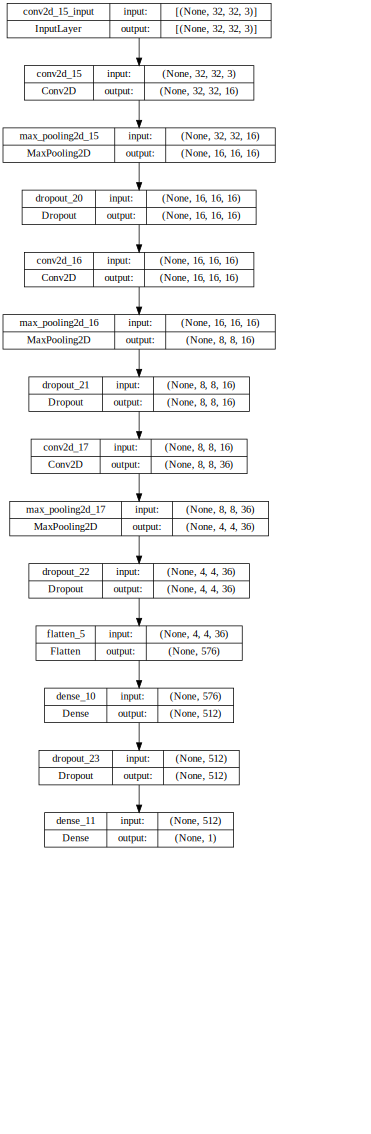

In [156]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model,show_shapes = True).create(prog='dot', format='svg'))

In [157]:
# Evaluate the model on test set
score = model.evaluate(x_valid, y_valid, verbose="0")

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8823529481887817


In [158]:
labels=["No", "Yes"]

2/2 [==============================] - 0s 7ms/step


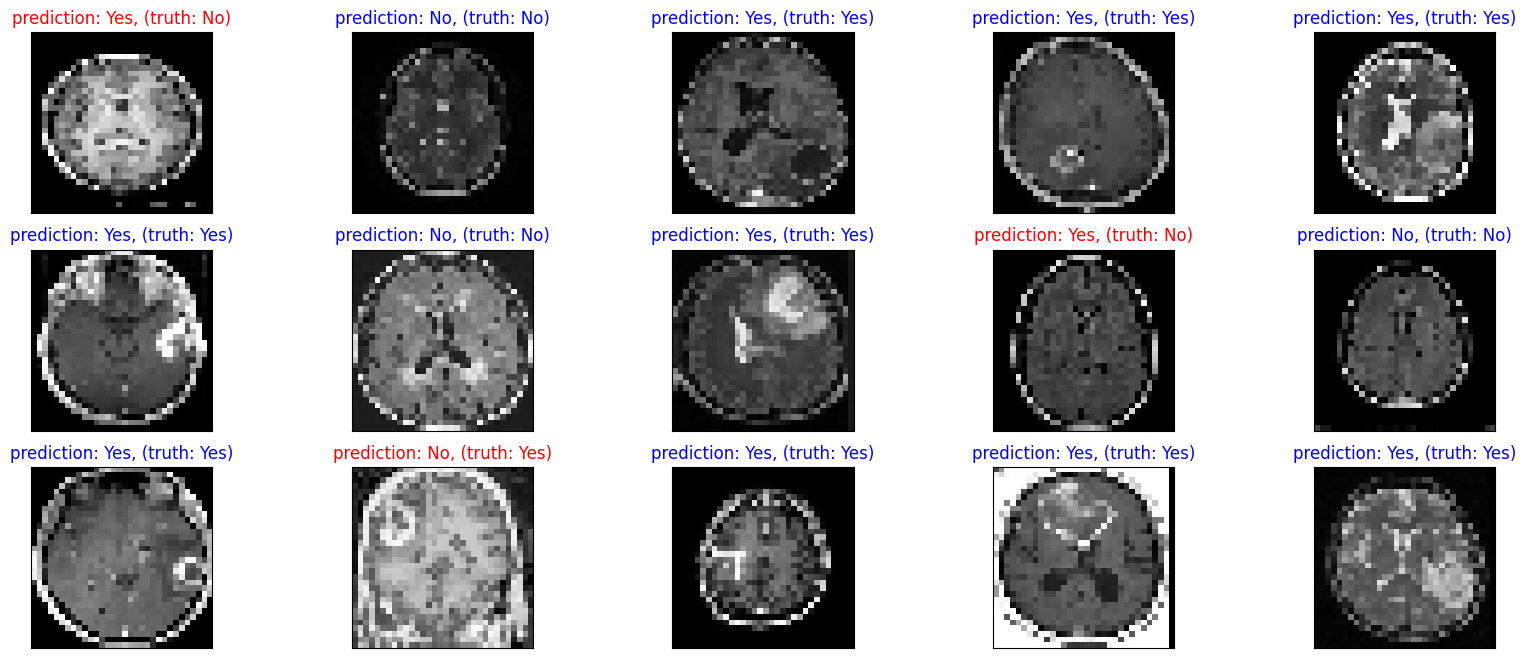

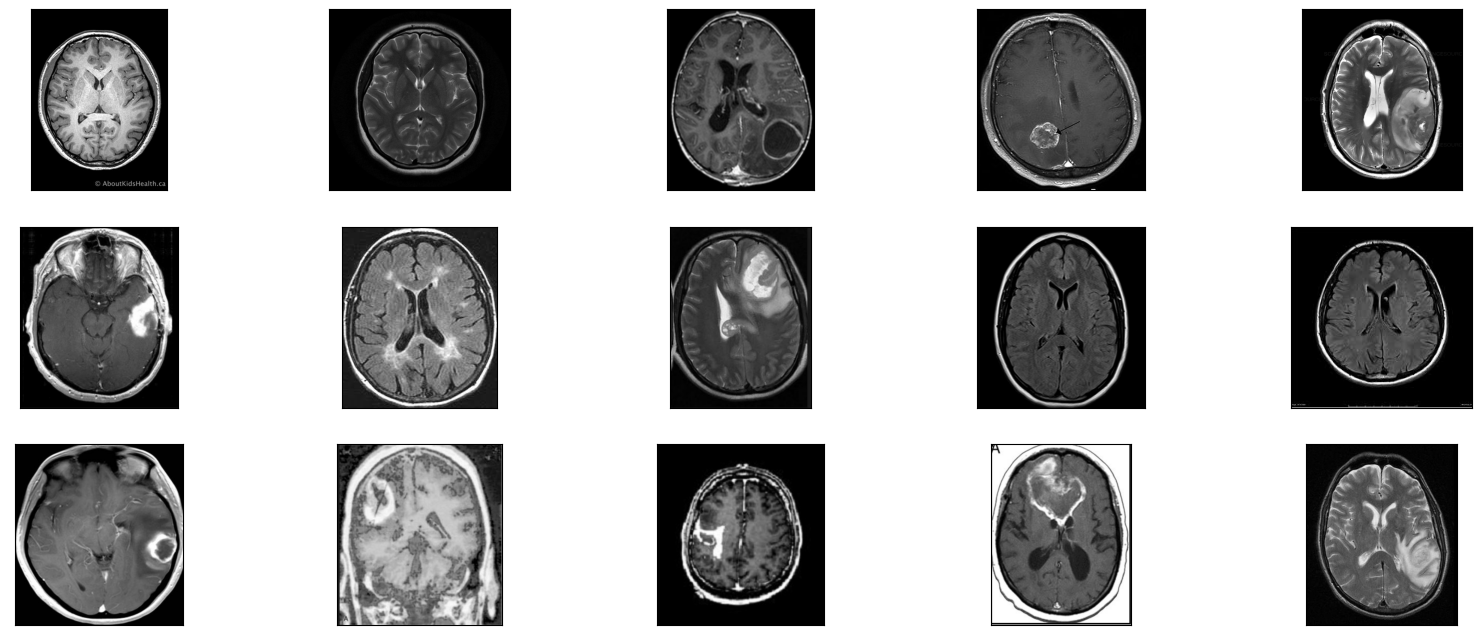

In [170]:
y_hat = model.predict(x_valid)
selected_indexes: list[int] = []
# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_valid.shape[0], size=15, replace=False)):
    selected_indexes.append(index)
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_valid[index]))

    predict_index = y_hat[index][0]
    predict_index_abs = 0 if (predict_index < 0.5) else 1
    true_index = y_valid[index]
    # Set the title for each image
    ax.set_title("prediction: {}, truth: {}".format(labels[predict_index_abs],
                                  labels[true_index]),
                 color=("blue" if predict_index_abs == true_index else "red"))
plt.show()

# Show the Original MRIs of the randomly selected images
figure = plt.figure(figsize=(20, 8))
for i in range(15):
    # get the original image
    img = x_orig_valid[selected_indexes[i]]
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(img))

# show the plot
plt.show()

